In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import glob,os
import cmocean as cm

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cftime as cft

import gsw as gsw

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 8,Total memory: 100.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:40805,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 8
Started: Just now,Total memory: 100.00 GiB
Comm: tcp://127.0.0.1:40821,Total threads: 2
Dashboard: /proxy/38745/status,Memory: 25.00 GiB
Nanny: tcp://127.0.0.1:36077,


In [3]:
def gcdist(lat1, lat2, lon1, lon2):
    # Radius of the Earth in m
    r = 6371000
    # Difference between points (lon/lat)
    dlon = lon2-lon1
    dlat = lat2-lat1
    # Calculate distance in km
    gcdist = r * np.deg2rad(np.sqrt(dlat**2 + (dlon*np.cos(np.deg2rad(np.mean([lat1,lat2]))))**2))

    return gcdist

In [4]:
# /g/data/v45/pas561/RG_Argo
rgargo_1921=xr.open_mfdataset('/g/data/jk72/mxr581/SOTS-project-data/RG_Argo/*9.nc',engine='netcdf4',combine='nested',concat_dim='TIME',decode_times=False)
rgargo_1921


<xarray.Dataset>
Dimensions:                   (LONGITUDE: 360, LATITUDE: 145, PRESSURE: 58,
                               TIME: 1)
Coordinates:
  * LONGITUDE                 (LONGITUDE) float32 20.5 21.5 22.5 ... 378.5 379.5
  * LATITUDE                  (LATITUDE) float32 -64.5 -63.5 -62.5 ... 78.5 79.5
  * PRESSURE                  (PRESSURE) float32 2.5 10.0 ... 1.9e+03 1.975e+03
  * TIME                      (TIME) float32 180.5
Data variables:
    ARGO_TEMPERATURE_ANOMALY  (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 58, 145, 360), meta=np.ndarray>
    ARGO_SALINITY_ANOMALY     (TIME, PRESSURE, LATITUDE, LONGITUDE) float32 dask.array<chunksize=(1, 58, 145, 360), meta=np.ndarray>

In [5]:
#get dxt and dyt for area averaging
print(rgargo_1921.LONGITUDE.shape,rgargo_1921.LATITUDE.shape) 
dxt=np.zeros(rgargo_1921.LONGITUDE.shape) 
dyt=np.zeros(rgargo_1921.LATITUDE.shape) 

for i in range(1,rgargo_1921.LATITUDE.shape[0]):
    dyt[i]=gcdist(rgargo_1921.LATITUDE[i-1],rgargo_1921.LATITUDE[i],rgargo_1921.LONGITUDE[i],rgargo_1921.LONGITUDE[i])
dyt[0]=dyt[1]
dyt

(360,) (145,)


array([111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
      

In [6]:
rg_dyt = xr.DataArray(
    data=dyt,
    dims=["LATITUDE"],
    coords=dict(
        lat=(["LATITUDE"], rgargo_1921.LATITUDE.data),
    ),
    attrs=dict(
        description="RGARGO grid dyt",
        units="m",
    ),
)
rg_dyt

<xarray.DataArray (LATITUDE: 145)>
array([111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832, 111194.9257832, 111194.9257832, 111194.9257832,
       111194.9257832])
Coordinates:
    lat      (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 76.5 77.5 78.5 79.5
Dimensions without coordinates: LATITUDE
Attributes:
    description:  RGARGO grid dyt
    units:        m

In [7]:
#load full 3D anoms
rgargo_temp_0421_anom_ltmm=xr.open_dataset('/g/data/jk72/mxr581/SOTS-project-data/RG_Argo/rgargo_temp_0421_anom_ltmm.nc',engine='netcdf4',decode_times=False).to_array()
rgargo_temp_0421_anom_ltmm

<xarray.DataArray (variable: 1, TIME: 216, PRESSURE: 58, LATITUDE: 145,
                   LONGITUDE: 360)>
array([[[[[-1.28499985e-01, -1.44888878e-01, -1.48166671e-01, ...,
            6.74444586e-02, -2.45000236e-02, -9.13889334e-02],
          [-1.67666674e-01, -1.62333280e-01, -1.59000069e-01, ...,
           -6.01110458e-02, -1.26888841e-01, -1.62055597e-01],
          [-1.99000001e-01, -1.91888928e-01, -1.90611094e-01, ...,
           -1.85888872e-01, -2.03777745e-01, -2.06055582e-01],
          ...,
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan]],

         [[-1.19833298e-01, -1.34499982e-01, -1.36944443e-01, ...,
            7.73888379e-02, -1.65000353e-02, -8.26111585e-02],
          [-1.57666624e-01, -1.51888922e-01, -1.47722214e-01, ...,
           -4.94444966e-02, -1.18333377e-01, -1.53166607e-01],
          [-1.89277768e-01, -1.82388872e-01, -1.79833278e-01, ...,
           -1.76222175e-01, -1.94833338e-01, -1.96999952e-01],
...
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan]],

         [[-5.55574894e-04, -7.22214580e-04, -6.11111522e-04, ...,
           -1.49011612e-08, -5.55559993e-04, -9.99972224e-04],
          [-7.72221386e-03, -8.50000978e-03, -6.66669011e-03, ...,
           -1.55554712e-03, -3.27777863e-03, -5.27778268e-03],
          [-1.01666451e-02, -1.17222071e-02, -9.94443893e-03, ...,
            5.55664301e-05, -2.49999762e-03, -6.66667521e-03],
          ...,
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan],
          [            nan,             nan,             nan, ...,
                       nan,             nan,             nan]]]]],
      dtype=float32)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 20.5 21.5 22.5 23.5 ... 377.5 378.5 379.5
  * LATITUDE   (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 77.5 78.5 79.5
  * PRESSURE   (PRESSURE) float32 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03
  * TIME       (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5
  * variable   (variable) object '__xarray_dataarray_variable__'

In [10]:
rgargo_temp_0421_anom_ltmm.sel(LONGITUDE=slice(145,150))

<xarray.DataArray (variable: 1, TIME: 216, PRESSURE: 58, LATITUDE: 145,
                   LONGITUDE: 5)>
array([[[[[-6.76111579e-02, -8.29444528e-02, -9.57778096e-02,
           -9.84444022e-02, -8.63333046e-02],
          [-6.66664839e-02, -7.92220831e-02, -9.72222090e-02,
           -1.12777710e-01, -1.16388857e-01],
          [-5.75554371e-02, -6.91112280e-02, -7.92224407e-02,
           -9.12222862e-02, -9.21111107e-02],
          ...,
          [            nan,             nan,             nan,
                       nan,             nan],
          [            nan,             nan,             nan,
                       nan,             nan],
          [            nan,             nan,             nan,
                       nan,             nan]],

         [[-7.54999518e-02, -8.99999738e-02, -1.06277823e-01,
           -1.13166690e-01, -1.03944480e-01],
          [-6.73888922e-02, -8.08333158e-02, -1.04722261e-01,
           -1.26222253e-01, -1.28333330e-01],
          [-4.76666689e-02, -6.52779341e-02, -8.30553770e-02,
           -9.68333483e-02, -9.53888893e-02],
...
          [            nan,             nan,             nan,
                       nan,             nan],
          [            nan,             nan,             nan,
                       nan,             nan],
          [            nan,             nan,             nan,
                       nan,             nan]],

         [[-2.17777491e-02, -2.01667547e-02, -1.86111331e-02,
           -1.69443488e-02, -1.58333182e-02],
          [-2.68889070e-02, -2.51666307e-02, -2.24444270e-02,
           -1.88888907e-02, -1.61665678e-02],
          [-5.57221770e-02, -5.19444346e-02, -4.01110649e-02,
           -2.76666880e-02, -1.81667209e-02],
          ...,
          [            nan,             nan,             nan,
                       nan,             nan],
          [            nan,             nan,             nan,
                       nan,             nan],
          [            nan,             nan,             nan,
                       nan,             nan]]]]], dtype=float32)
Coordinates:
  * LONGITUDE  (LONGITUDE) float32 145.5 146.5 147.5 148.5 149.5
  * LATITUDE   (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 77.5 78.5 79.5
  * PRESSURE   (PRESSURE) float32 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03
  * TIME       (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5
  * variable   (variable) object '__xarray_dataarray_variable__'

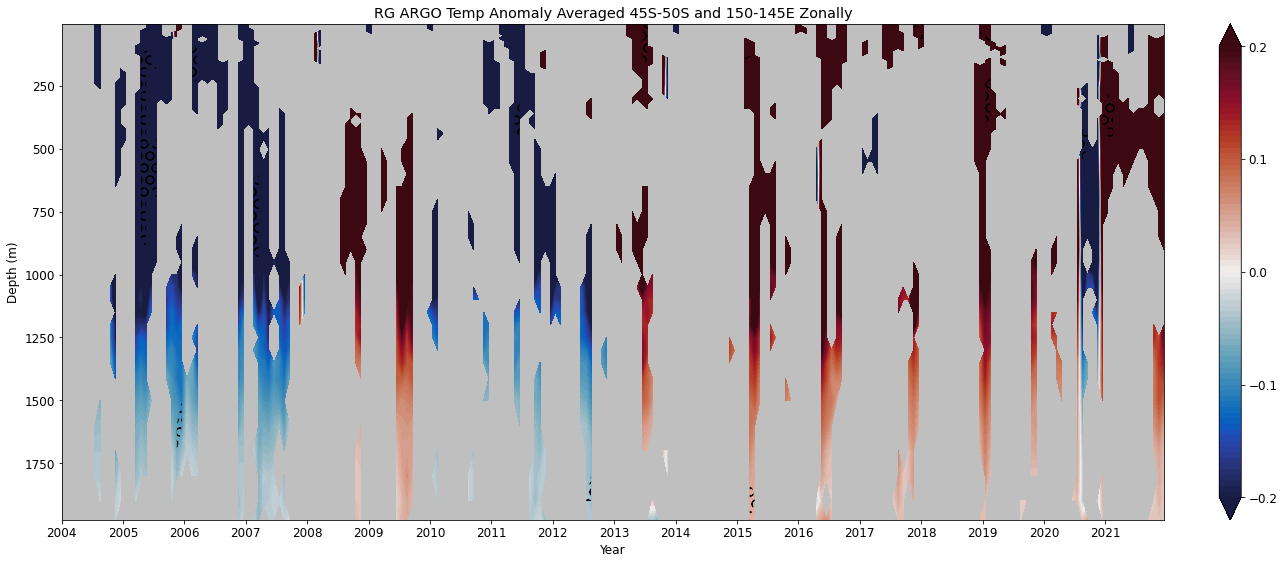

In [11]:
#plot hovmoller
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize=(18,8))

clev = np.arange(-0.2,0.205,.005)
tick_lvls = np.arange(-0.2,.3, .1)

#calc zavg temp ltmm anoms 
temp_zavg_anom=rgargo_temp_0421_anom_ltmm.sel(LONGITUDE=slice(145,150)).mean(dim='LONGITUDE').load()
#average south of 55S for hovmoller
temp_zavg_anom_s55S=(temp_zavg_anom*rg_dyt).sel(LATITUDE=slice(-50,-45)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-50,-45)).sum()
temp_zavg_anom_s55S=temp_zavg_anom_s55S.where(temp_zavg_anom_s55S!=0,np.NaN).squeeze()
#anom/std
temp_zavg_anom_s55S_div_std=temp_zavg_anom_s55S/temp_zavg_anom_s55S.std(axis=0,keep_attrs=True)
temp_zavg_anom_s55S_div_std   

var1= temp_zavg_anom_s55S
#monthly mean anom zavg/std
var2=temp_zavg_anom_s55S_div_std

p1=plt.contourf(var1.TIME,var1.PRESSURE,var1.where((var2>1) | (var2<-1)).data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #    
p2=plt.contourf(var1.TIME,var1.PRESSURE,var2.where((var2>2) | (var2<-2)).data.transpose(),colors='none',hatches='O') #
#p3=plt.contourf(var1.TIME,var1.PRESSURE,var1.where((var2>1) | (var2<-1)).data.transpose(),colors='none',hatches='x') #

plt.gca().invert_yaxis()
plt.gca().patch.set_color('.75')
plt.ylabel('Depth (m)')
plt.xlabel('Year')
plt.title('RG ARGO Temp Anomaly Averaged 45S-50S and 150-145E Zonally')

xticks = np.arange(0,216,12)
xtick_lbls = np.arange(2004,2022,1)
plt.xticks(xticks) #[120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(xtick_lbls.astype(str)) 

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

plt.tight_layout()

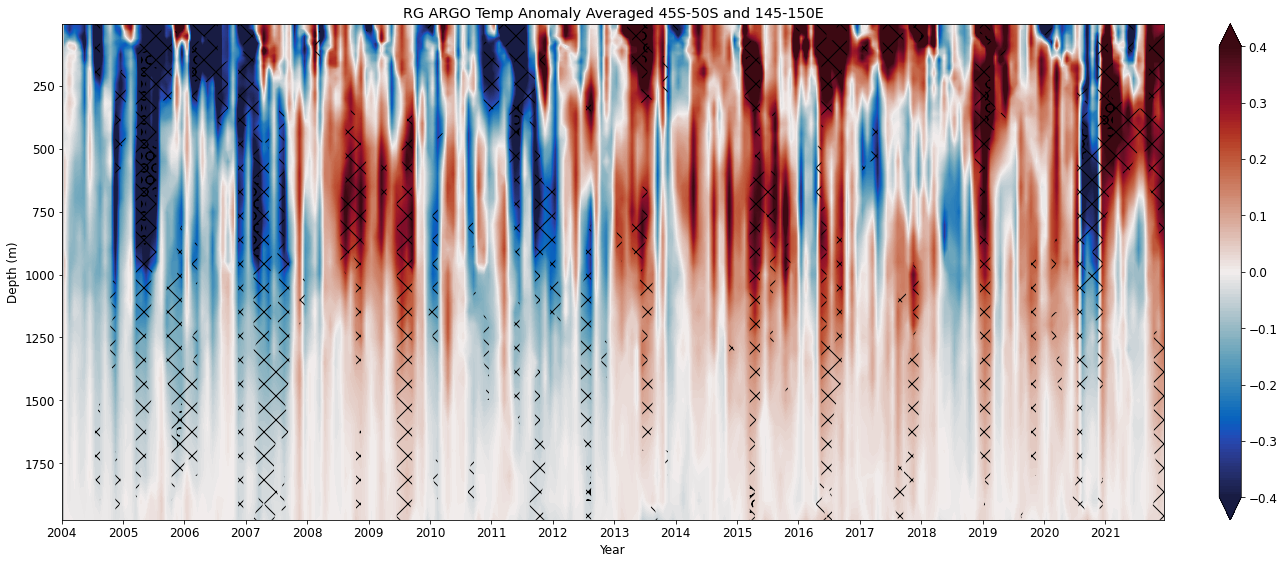

In [15]:
#plot hovmoller
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize=(18,8))

clev = np.arange(-0.4,0.405,.005)
tick_lvls = np.arange(-0.4,.5, .1)

#calc zavg temp ltmm anoms 
temp_zavg_anom=rgargo_temp_0421_anom_ltmm.sel(LONGITUDE=slice(145,150)).mean(dim='LONGITUDE').compute()
#average south of 55S for hovmoller
temp_zavg_anom_s55S=(temp_zavg_anom*rg_dyt).sel(LATITUDE=slice(-50,-45)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-50,-45)).sum()
temp_zavg_anom_s55S=temp_zavg_anom_s55S.where(temp_zavg_anom_s55S!=0,np.NaN).squeeze()
#anom/std
temp_zavg_anom_s55S_div_std=temp_zavg_anom_s55S/temp_zavg_anom_s55S.std(axis=0,keep_attrs=True)
temp_zavg_anom_s55S_div_std   

var1= temp_zavg_anom_s55S
#monthly mean anom zavg/std
var2=temp_zavg_anom_s55S_div_std

p1=plt.contourf(var1.TIME,var1.PRESSURE,var1.data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #    
p2=plt.contourf(var1.TIME,var1.PRESSURE,var2.where((var2>2) | (var2<-2)).data.transpose(),colors='none',hatches='O') #
p3=plt.contourf(var1.TIME,var1.PRESSURE,var1.where((var2>1) | (var2<-1)).data.transpose(),colors='none',hatches='x') #

plt.gca().invert_yaxis()
plt.gca().patch.set_color('.75')
plt.ylabel('Depth (m)')
plt.xlabel('Year')
plt.title('RG ARGO Temp Anomaly Averaged 45S-50S and 145-150E')

xticks = np.arange(0,216,12)
xtick_lbls = np.arange(2004,2022,1)
plt.xticks(xticks) #[120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(xtick_lbls.astype(str)) 

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

plt.tight_layout()
#plt.savefig('rgargo_temp_0421_anom_ltmm_s55S_zavg_hov.png',dpi=150,bbox_inches='tight')


In [33]:
#average south of 60S for hovmoller
#lat weighted average
temp_zavg_anom_s60S=(temp_zavg_anom*rg_dyt).sel(LATITUDE=slice(-65,-60)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-65,-60)).sum()
temp_zavg_anom_s60S=temp_zavg_anom_s60S.where(temp_zavg_anom_s60S!=0,np.NaN).squeeze()
temp_zavg_anom_s60S

<xarray.DataArray (TIME: 216, PRESSURE: 58)>
array([[-0.1135664 , -0.11458687, -0.10569342, ..., -0.00195899,
        -0.00696475, -0.00024105],
       [-0.04324554, -0.04303549, -0.04367359, ..., -0.00285072,
        -0.00416155, -0.00924084],
       [ 0.02651136,  0.02612625,  0.02443012, ...,  0.0002845 ,
         0.00724365, -0.00104448],
       ...,
       [ 0.01510025,  0.0153984 ,  0.01648013, ...,  0.00065234,
        -0.00255531,  0.00176817],
       [-0.00704034, -0.00541743,  0.00138626, ...,  0.00063777,
        -0.00247156, -0.00606302],
       [-0.11826363, -0.1090752 , -0.08494415, ..., -0.00671537,
        -0.00457272, -0.0089304 ]])
Coordinates:
  * PRESSURE  (PRESSURE) float32 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03
  * TIME      (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5
    variable  <U29 '__xarray_dataarray_variable__'

In [34]:
#anom/std
temp_zavg_anom_s60S_div_std=temp_zavg_anom_s60S/temp_zavg_anom_s60S.std(axis=0,keep_attrs=True)
temp_zavg_anom_s60S_div_std                                                

<xarray.DataArray (TIME: 216, PRESSURE: 58)>
array([[-0.70670951, -0.72072668, -0.68158455, ..., -0.23827118,
        -0.82627443, -0.02944068],
       [-0.2691116 , -0.27068397, -0.28163765, ..., -0.34673169,
        -0.49371203, -1.1286408 ],
       [ 0.16497687,  0.1643285 ,  0.15754237, ...,  0.03460319,
         0.85936299, -0.12756828],
       ...,
       [ 0.09396696,  0.09685263,  0.10627533, ...,  0.07934328,
        -0.30315347,  0.21595702],
       [-0.04381118, -0.03407449,  0.00893958, ...,  0.0775712 ,
        -0.29321818, -0.74051391],
       [-0.73593977, -0.68605948, -0.54777887, ..., -0.81678584,
        -0.54249221, -1.09072428]])
Coordinates:
  * PRESSURE  (PRESSURE) float32 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03
  * TIME      (TIME) float64 0.5 1.5 2.5 3.5 4.5 ... 212.5 213.5 214.5 215.5
    variable  <U29 '__xarray_dataarray_variable__'

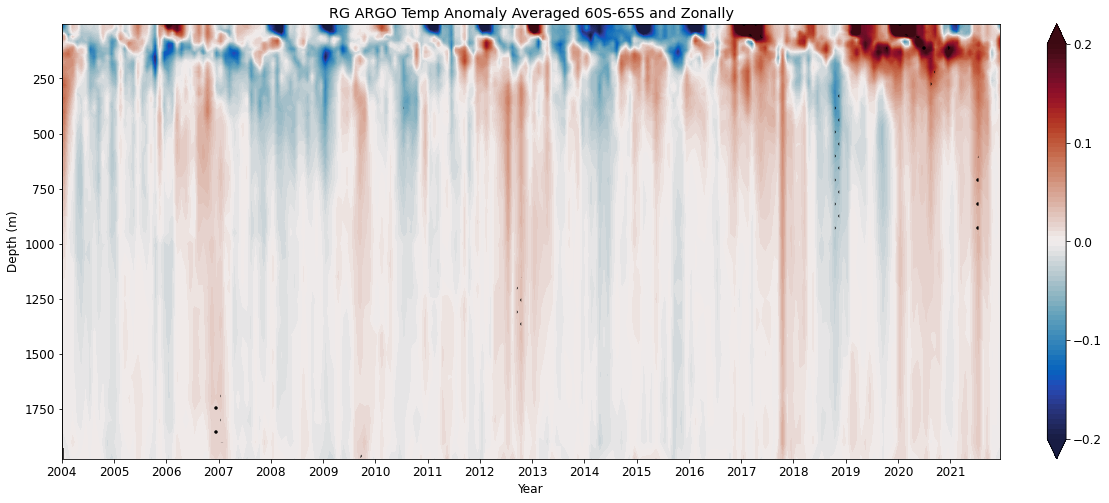

In [61]:
#plot hovmoller
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize=(18,8))

clev = np.arange(-0.2,0.205,.005)
tick_lvls = np.arange(-0.2,.3, .1)

#calc zavg temp ltmm anoms 
temp_zavg_anom=rgargo_temp_0421_anom_ltmm.mean(dim='LONGITUDE').compute()
#average south of 55S for hovmoller
temp_zavg_anom_s60S=(temp_zavg_anom*rg_dyt).sel(LATITUDE=slice(-65,-60)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-65,-60)).sum()
temp_zavg_anom_s60S=temp_zavg_anom_s60S.where(temp_zavg_anom_s60S!=0,np.NaN).squeeze()
#anom/std
temp_zavg_anom_s60S_div_std=temp_zavg_anom_s60S/temp_zavg_anom_s60S.std(axis=0,keep_attrs=True)
temp_zavg_anom_s60S_div_std   

var1= temp_zavg_anom_s60S[:,:]
p1=plt.contourf(var1.TIME,var1.PRESSURE,var1.data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #
    
#monthly mean anom zavg/std
var1=temp_zavg_anom_s60S_div_std[:,:]
p2=plt.contourf(var1.TIME,var1.PRESSURE,var1.where((var1>2) | (var1<-2)).data.transpose(),colors='none',hatches='.') #

plt.gca().invert_yaxis()
plt.gca().patch.set_color('.25')
plt.ylabel('Depth (m)')
plt.xlabel('Year')
plt.title('RG ARGO Temp Anomaly Averaged 60S-65S and Zonally')

xticks = np.arange(0,216,12)
xtick_lbls = np.arange(2004,2022,1)
plt.xticks(xticks) #[120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(xtick_lbls.astype(str)) 

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

plt.savefig('rgargo_temp_0421_anom_ltmm_s60S_zavg_hov.png',dpi=150,bbox_inches='tight')


In [ ]:
#60-120E (E. Antarctic)
#180-240E (e. Ross-Amundsen)
#270-300 (Bellingshausen)
#300-360 (Weddell)

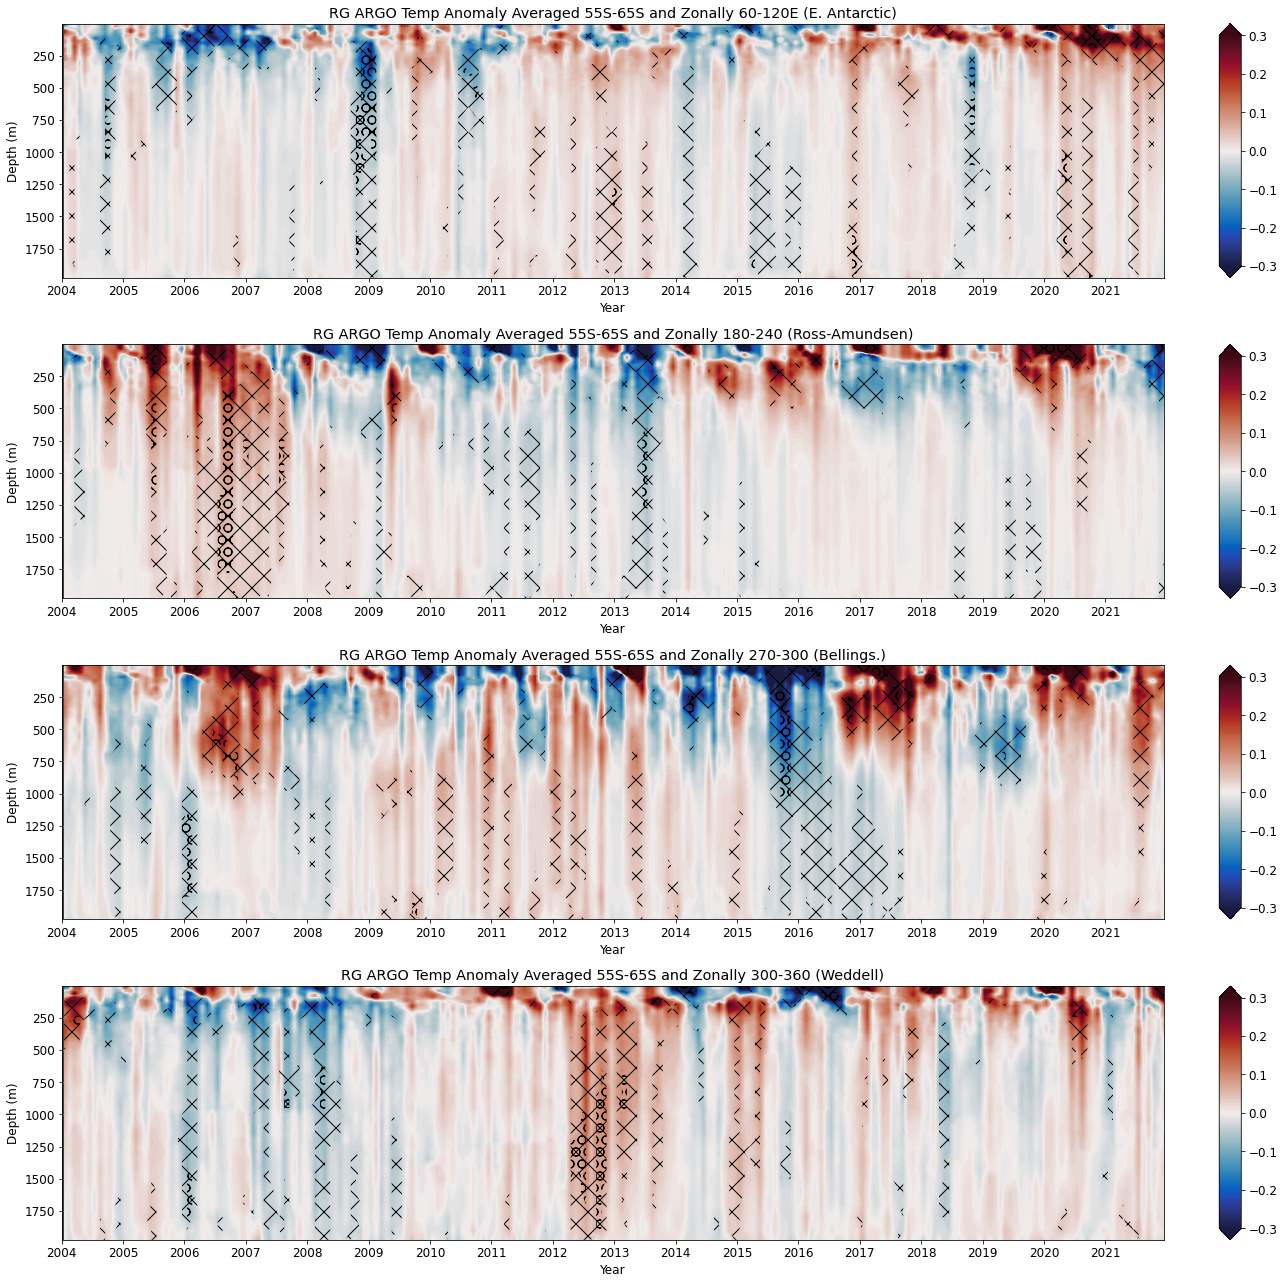

In [68]:
#plot hovmoller
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize=(18,18))

clev = np.arange(-0.3,0.305,.005)
tick_lvls = np.arange(-0.3,.4, .1)

plt.subplot(4,1,1)

#calc zavg temp ltmm anoms - E. Antarctica #60-120E (E. Antarctic)
temp_zavg_anom=rgargo_temp_0421_anom_ltmm.sel(LONGITUDE=slice(60,120)).mean(dim='LONGITUDE').compute()
#average south of 55S for hovmoller
temp_zavg_anom_s55S=(temp_zavg_anom*rg_dyt).sel(LATITUDE=slice(-65,-55)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-65,-55)).sum()
temp_zavg_anom_s55S=temp_zavg_anom_s55S.where(temp_zavg_anom_s55S!=0,np.NaN).squeeze()
#anom/std
temp_zavg_anom_s55S_div_std=temp_zavg_anom_s55S/temp_zavg_anom_s55S.std(axis=0,keep_attrs=True)
temp_zavg_anom_s55S_div_std   

var1= temp_zavg_anom_s55S
#monthly mean anom zavg/std
var2=temp_zavg_anom_s55S_div_std

p1=plt.contourf(var1.TIME,var1.PRESSURE,var1.data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #    
p2=plt.contourf(var1.TIME,var1.PRESSURE,var2.where((var2>2) | (var2<-2)).data.transpose(),colors='none',hatches='O') #
p3=plt.contourf(var1.TIME,var1.PRESSURE,var1.where((var2>1) | (var2<-1)).data.transpose(),colors='none',hatches='x') #

plt.gca().invert_yaxis()
plt.gca().patch.set_color('.25')
plt.ylabel('Depth (m)')
plt.xlabel('Year')
plt.title('RG ARGO Temp Anomaly Averaged 55S-65S and Zonally 60-120E (E. Antarctic)')

xticks = np.arange(0,216,12)
xtick_lbls = np.arange(2004,2022,1)
plt.xticks(xticks) #[120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(xtick_lbls.astype(str)) 

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

plt.subplot(4,1,2)

#calc zavg temp ltmm anoms - #180-240E (e. Ross-Amundsen)
temp_zavg_anom=rgargo_temp_0421_anom_ltmm.sel(LONGITUDE=slice(180,240)).mean(dim='LONGITUDE').compute()
#average south of 55S for hovmoller
temp_zavg_anom_s55S=(temp_zavg_anom*rg_dyt).sel(LATITUDE=slice(-65,-55)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-65,-55)).sum()
temp_zavg_anom_s55S=temp_zavg_anom_s55S.where(temp_zavg_anom_s55S!=0,np.NaN).squeeze()
#anom/std
temp_zavg_anom_s55S_div_std=temp_zavg_anom_s55S/temp_zavg_anom_s55S.std(axis=0,keep_attrs=True)
temp_zavg_anom_s55S_div_std   

var1= temp_zavg_anom_s55S
#monthly mean anom zavg/std
var2=temp_zavg_anom_s55S_div_std

p1=plt.contourf(var1.TIME,var1.PRESSURE,var1.data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #    
p2=plt.contourf(var1.TIME,var1.PRESSURE,var2.where((var2>2) | (var2<-2)).data.transpose(),colors='none',hatches='O') #
p3=plt.contourf(var1.TIME,var1.PRESSURE,var1.where((var2>1) | (var2<-1)).data.transpose(),colors='none',hatches='x') #

plt.gca().invert_yaxis()
plt.gca().patch.set_color('.25')
plt.ylabel('Depth (m)')
plt.xlabel('Year')
plt.title('RG ARGO Temp Anomaly Averaged 55S-65S and Zonally 180-240 (Ross-Amundsen)')

xticks = np.arange(0,216,12)
xtick_lbls = np.arange(2004,2022,1)
plt.xticks(xticks) #[120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(xtick_lbls.astype(str)) 

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

plt.subplot(4,1,3)

#calc zavg temp ltmm anoms - #270-300 (Bellingshausen)
temp_zavg_anom=rgargo_temp_0421_anom_ltmm.sel(LONGITUDE=slice(270,300)).mean(dim='LONGITUDE').compute()
#average south of 55S for hovmoller
temp_zavg_anom_s55S=(temp_zavg_anom*rg_dyt).sel(LATITUDE=slice(-65,-55)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-65,-55)).sum()
temp_zavg_anom_s55S=temp_zavg_anom_s55S.where(temp_zavg_anom_s55S!=0,np.NaN).squeeze()
#anom/std
temp_zavg_anom_s55S_div_std=temp_zavg_anom_s55S/temp_zavg_anom_s55S.std(axis=0,keep_attrs=True)

var1= temp_zavg_anom_s55S
#monthly mean anom zavg/std
var2=temp_zavg_anom_s55S_div_std

p1=plt.contourf(var1.TIME,var1.PRESSURE,var1.data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #    
p2=plt.contourf(var1.TIME,var1.PRESSURE,var2.where((var2>2) | (var2<-2)).data.transpose(),colors='none',hatches='O') #
p3=plt.contourf(var1.TIME,var1.PRESSURE,var1.where((var2>1) | (var2<-1)).data.transpose(),colors='none',hatches='x') #

plt.gca().invert_yaxis()
plt.gca().patch.set_color('.25')
plt.ylabel('Depth (m)')
plt.xlabel('Year')
plt.title('RG ARGO Temp Anomaly Averaged 55S-65S and Zonally 270-300 (Bellings.)')

xticks = np.arange(0,216,12)
xtick_lbls = np.arange(2004,2022,1)
plt.xticks(xticks) #[120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(xtick_lbls.astype(str)) 

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')


plt.subplot(4,1,4)

#calc zavg temp ltmm anoms - #300-360 (Weddell)
temp_zavg_anom=rgargo_temp_0421_anom_ltmm.sel(LONGITUDE=slice(300,360)).mean(dim='LONGITUDE').compute()
#average south of 55S for hovmoller
temp_zavg_anom_s55S=(temp_zavg_anom*rg_dyt).sel(LATITUDE=slice(-65,-55)).sum('LATITUDE') / rg_dyt.sel(LATITUDE=slice(-65,-55)).sum()
temp_zavg_anom_s55S=temp_zavg_anom_s55S.where(temp_zavg_anom_s55S!=0,np.NaN).squeeze()
#anom/std
temp_zavg_anom_s55S_div_std=temp_zavg_anom_s55S/temp_zavg_anom_s55S.std(axis=0,keep_attrs=True)

var1= temp_zavg_anom_s55S
#monthly mean anom zavg/std
var2=temp_zavg_anom_s55S_div_std

p1=plt.contourf(var1.TIME,var1.PRESSURE,var1.data.transpose(),cmap=cm.cm.balance,levels=clev,extend='both') #    
p2=plt.contourf(var1.TIME,var1.PRESSURE,var2.where((var2>2) | (var2<-2)).data.transpose(),colors='none',hatches='O') #
p3=plt.contourf(var1.TIME,var1.PRESSURE,var1.where((var2>1) | (var2<-1)).data.transpose(),colors='none',hatches='x') #

plt.gca().invert_yaxis()
plt.gca().patch.set_color('.25')
plt.ylabel('Depth (m)')
plt.xlabel('Year')
plt.title('RG ARGO Temp Anomaly Averaged 55S-65S and Zonally 300-360 (Weddell)')

xticks = np.arange(0,216,12)
xtick_lbls = np.arange(2004,2022,1)
plt.xticks(xticks) #[120.5,120.5+12,120.5+24,120.5+36,120.5+48,120.5+60,120.5+72,120.5+84])
plt.gca().set_xticklabels(xtick_lbls.astype(str)) 

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')
#plt.savefig('rgargo_temp_0421_anom_ltmm_s55S_zavg_Bellings_hov.png',dpi=150,bbox_inches='tight')

plt.tight_layout()
plt.savefig('rgargo_temp_0421_anom_ltmm_s55S_zavg_sectors.png',dpi=150,bbox_inches = 'tight')

In [19]:
#make a movie of zonal average temp anoms/std

fig = plt.figure(figsize=(12, 12), dpi=150)
plt.subplot(1, 1, 1)
plt.gca().patch.set_color('.25')

clev = np.arange(-0.2,0.205,.005)
tick_lvls = np.arange(-0.2,.3, .1)

#clev2 = np.arange(-3,3.1,.1)
#tick_lvls2 = np.arange(-3,3.1,.1)

yr=2013
mnth= 0 #['Jan,Feb,Mar]
mnth_txt=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sept','Oct','Nov','Dec']


for ii in range(0,96): #96
    
    if np.mod(ii,12)==0:
        yr=yr+1
        mnth=0
    print(mnth,ii) #var2a.TIME)
    
    #monthly mean anom zavg
    var1=rgargo_temp_0421_anom_ltmm.mean(dim='LONGITUDE')[120+ii]
    p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
    
    #monthly mean anom zavg/std
    var1=temp_zavg_anom_div_std[120+ii]
    p2=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1.where((var1>2) | (var1<-2)),colors='none',hatches='.') #
    
    plt.gca().invert_yaxis()
    plt.ylabel('Pressure (dbar)')
    plt.xlabel('Latitude ($^\circ$S)')
    #plt.ylim((5500,1000))
    plt.xlim([-64.5,-30])
    #plt.xticks([-65,-55])       
    tit='RG ARGO Temp Anomaly (-LTMM)/STD '+ str(yr) +' '+mnth_txt[mnth]
    print(tit)
    plt.title(tit)
    
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", "2%", pad="5%")
    cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
    cb.ax.set_xlabel('$^\circ$C')

    plt.tight_layout()
    
    mnth=mnth+1
    
    filestr = '/home/561/pas561/gdv45/jnb/SeaIce2021/movies/zavg_ltmm_temp_anom_div_std_image%04d.png' % ii
    plt.savefig(filestr,dpi=150,bbox_inches='tight')
    plt.clf()

0 0
RG ARGO Temp Anomaly (-LTMM)/STD 2014 Jan
1 1
RG ARGO Temp Anomaly (-LTMM)/STD 2014 Feb
2 2
RG ARGO Temp Anomaly (-LTMM)/STD 2014 Mar
3 3
RG ARGO Temp Anomaly (-LTMM)/STD 2014 Apr
4 4
RG ARGO Temp Anomaly (-LTMM)/STD 2014 May
5 5
RG ARGO Temp Anomaly (-LTMM)/STD 2014 Jun
6 6
RG ARGO Temp Anomaly (-LTMM)/STD 2014 July
7 7
RG ARGO Temp Anomaly (-LTMM)/STD 2014 Aug
8 8
RG ARGO Temp Anomaly (-LTMM)/STD 2014 Sept
9 9
RG ARGO Temp Anomaly (-LTMM)/STD 2014 Oct
10 10
RG ARGO Temp Anomaly (-LTMM)/STD 2014 Nov
11 11
RG ARGO Temp Anomaly (-LTMM)/STD 2014 Dec
0 12
RG ARGO Temp Anomaly (-LTMM)/STD 2015 Jan
1 13
RG ARGO Temp Anomaly (-LTMM)/STD 2015 Feb
2 14
RG ARGO Temp Anomaly (-LTMM)/STD 2015 Mar
3 15
RG ARGO Temp Anomaly (-LTMM)/STD 2015 Apr
4 16
RG ARGO Temp Anomaly (-LTMM)/STD 2015 May
5 17
RG ARGO Temp Anomaly (-LTMM)/STD 2015 Jun
6 18
RG ARGO Temp Anomaly (-LTMM)/STD 2015 July
7 19
RG ARGO Temp Anomaly (-LTMM)/STD 2015 Aug
8 20
RG ARGO Temp Anomaly (-LTMM)/STD 2015 Sept
9 21
RG ARGO Temp

<Figure size 1800x1800 with 0 Axes>

In [21]:
from PIL import Image
import glob
!ffmpeg -framerate 5 -pattern_type glob -i '/home/561/pas561/gdv45/jnb/SeaIce2021/movies/zavg_ltmm_temp_anom_div_std_image*.png' -s 1800x1800 -c:v libx264 -pix_fmt yuv420p /home/561/pas561/gdv45/jnb/SeaIce2021/movies/zavg_ltmm_temp_anom_hatched_1421.mp4

ffmpeg version 4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 9.4.0 (GCC)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-vaapi --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-libvpx --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/pkg-config
  lib

In [ ]:
# /g/data/v45/pas561/RG_Argo
rgargo_1921=xr.open_mfdataset('/g/data/v45/pas561/RG_Argo/*9.nc',engine='netcdf4',combine='nested',concat_dim='TIME',decode_times=False)
rgargo_1921


In [ ]:
rgargo_0418=xr.open_dataset('/g/data/v45/pas561/RG_Argo/RG_ArgoClim_Temperature_2014_2018.nc',engine='netcdf4',decode_times=False)
rgargo_0418

(58, 145)
(58, 145)
(58, 145)
(58, 145)
(58, 145)
(58, 145)
(58, 145)
(58, 145)


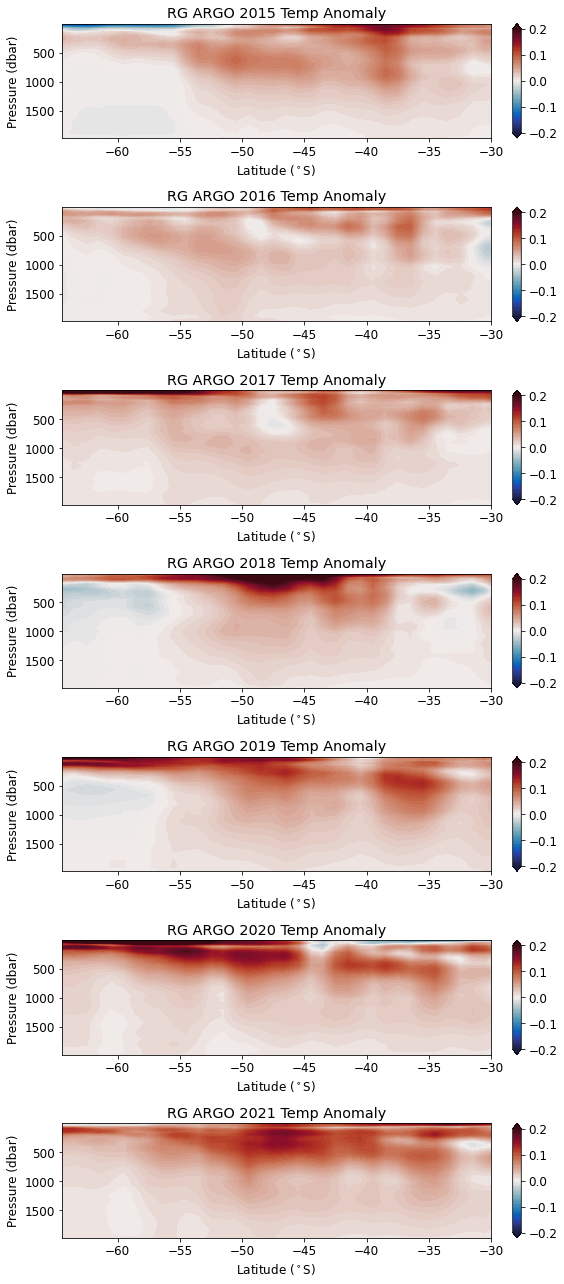

In [102]:
#plot zonal average for 2019/2020/2021
fontsize=12
plt.rcParams['font.size'] = fontsize

plt.figure(figsize=(8,18))

clev = np.arange(-0.2,0.205,.005)
tick_lvls = np.arange(-0.2,.3, .1)

var1= rgargo_0418.ARGO_TEMPERATURE_ANOMALY[132:144,:,:,:].mean(dim='LONGITUDE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,1)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.xlim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2015 Temp Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

var1= rgargo_0418.ARGO_TEMPERATURE_ANOMALY[144:156,:,:,:].mean(dim='LONGITUDE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,2)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.xlim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2016 Temp Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

var1= rgargo_0418.ARGO_TEMPERATURE_ANOMALY[156:168,:,:,:].mean(dim='LONGITUDE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,3)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.xlim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2017 Temp Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

var1= rgargo_0418.ARGO_TEMPERATURE_ANOMALY[168:180,:,:,:].mean(dim='LONGITUDE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,4)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.xlim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2018 Temp Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')


var1= rgargo_1921.ARGO_TEMPERATURE_ANOMALY[0:12,:,:,:].mean(dim='LONGITUDE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,5)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.xlim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2019 Temp Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')


var1= rgargo_1921.ARGO_TEMPERATURE_ANOMALY[12:24,:,:,:].mean(dim='LONGITUDE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,6)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.xlim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2020 Temp Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

var1= rgargo_1921.ARGO_TEMPERATURE_ANOMALY[24:36,:,:,:].mean(dim='LONGITUDE').mean(dim='TIME').compute()
print(var1.shape)

plt.subplot(7,1,7)
plt.gca().patch.set_color('.25')
p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var1,cmap=cm.cm.balance,levels=clev,extend='both') #
plt.gca().invert_yaxis()
plt.ylabel('Pressure (dbar)')
plt.xlabel('Latitude ($^\circ$S)')
#plt.ylim((5500,1000))
plt.xlim([-64.5,-30])
#plt.xticks([-65,-55])
plt.title('RG ARGO 2021 Temp Anomaly')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "2%", pad="5%")
cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
cb.ax.set_xlabel('$^\circ$C')

plt.tight_layout()

plt.savefig('RGARGO_Temp_Ann.png',dpi=220,bbox_inches = 'tight')

In [9]:
var1=rgargo_temp_anom_0421.mean(dim='LONGITUDE')[120].load()
var1

<xarray.DataArray 'ARGO_TEMPERATURE_ANOMALY' (PRESSURE: 58, LATITUDE: 145)>
array([[ 1.0649571e+00,  1.1680200e+00,  1.2141168e+00, ...,
        -1.6162105e+00, -1.5498002e+00, -1.3740001e+00],
       [ 1.0334172e+00,  1.1425897e+00,  1.1924139e+00, ...,
        -1.6044211e+00, -1.5603999e+00, -1.4208666e+00],
       [ 9.4079709e-01,  1.0622109e+00,  1.1135973e+00, ...,
        -1.4875790e+00, -1.4631333e+00, -1.3987999e+00],
       ...,
       [ 1.2914287e-03,  4.1994303e-03,  6.4833332e-03, ...,
                   nan,            nan,            nan],
       [-1.0314289e-03,  2.3618231e-03,  4.9999994e-03, ...,
                   nan,            nan,            nan],
       [ 8.8571142e-05, -4.3304847e-04,  5.4722244e-04, ...,
                   nan,            nan,            nan]], dtype=float32)
Coordinates:
  * LATITUDE  (LATITUDE) float32 -64.5 -63.5 -62.5 -61.5 ... 76.5 77.5 78.5 79.5
  * PRESSURE  (PRESSURE) float32 2.5 10.0 20.0 ... 1.8e+03 1.9e+03 1.975e+03
    TIME      float64 120.5

In [95]:
#make a movie of zonal average temp anoms relative to LTMM
#old movie method ... valideated! to check LTMM calc

fig = plt.figure(figsize=(12, 12), dpi=150)
plt.subplot(1, 1, 1)
plt.gca().patch.set_color('.25')

#clev = np.arange(-1.,1.05,.005)
#tick_lvls = np.arange(-1.,1.1, .1)
clev = np.arange(-0.2,0.205,.005)
tick_lvls = np.arange(-0.2,.3, .1)

yr=2013
mnth= 0 #['Jan,Feb,Mar]
mnth_txt=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sept','Oct','Nov','Dec']


for ii in range(0,96): #96
    
    if np.mod(ii,12)==0:
        yr=yr+1
        mnth=0
    print(mnth,ii) #var2a.TIME)
    
    #monthly mean
    var1=rgargo_temp_0421.mean(dim='LONGITUDE')[120+ii]
    
    #calc LTMM
    var2a=rgargo_temp_0421[mnth:216:12,:,:,:].load()
    var2=var2a.mean(dim='TIME').mean(dim='LONGITUDE').compute()
    
    var3=var1-var2
    
    p1=plt.contourf(var1.LATITUDE,var1.PRESSURE,var3,cmap=cm.cm.balance,levels=clev,extend='both') #
    plt.gca().invert_yaxis()
    plt.ylabel('Pressure (dbar)')
    plt.xlabel('Latitude ($^\circ$S)')
    #plt.ylim((5500,1000))
    plt.xlim([-64.5,-30])
    #plt.xticks([-65,-55])       
    tit='RG ARGO Temp Anomaly (-LTMM) '+ str(yr) +' '+mnth_txt[mnth]
    print(tit)
    plt.title(tit)
    
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", "2%", pad="5%")
    cb=plt.colorbar(p1,cax,orientation='vertical',ticks=tick_lvls)
    cb.ax.set_xlabel('$^\circ$C')

    plt.tight_layout()
    
    mnth=mnth+1
    
    filestr = '/home/561/pas561/gdv45/jnb/SeaIce2021/movies/zavg_ltmm_temp_image%04d.png' % ii
    plt.savefig(filestr,dpi=150,bbox_inches='tight')
    plt.clf()

0 0
RG ARGO Temp Anomaly (-LTMM) 2014 Jan
1 1
RG ARGO Temp Anomaly (-LTMM) 2014 Feb
2 2
RG ARGO Temp Anomaly (-LTMM) 2014 Mar
3 3
RG ARGO Temp Anomaly (-LTMM) 2014 Apr
4 4
RG ARGO Temp Anomaly (-LTMM) 2014 May
5 5
RG ARGO Temp Anomaly (-LTMM) 2014 Jun
6 6
RG ARGO Temp Anomaly (-LTMM) 2014 July
7 7
RG ARGO Temp Anomaly (-LTMM) 2014 Aug
8 8
RG ARGO Temp Anomaly (-LTMM) 2014 Sept
9 9
RG ARGO Temp Anomaly (-LTMM) 2014 Oct
10 10
RG ARGO Temp Anomaly (-LTMM) 2014 Nov
11 11
RG ARGO Temp Anomaly (-LTMM) 2014 Dec
0 12
RG ARGO Temp Anomaly (-LTMM) 2015 Jan
1 13
RG ARGO Temp Anomaly (-LTMM) 2015 Feb
2 14
RG ARGO Temp Anomaly (-LTMM) 2015 Mar
3 15
RG ARGO Temp Anomaly (-LTMM) 2015 Apr
4 16
RG ARGO Temp Anomaly (-LTMM) 2015 May
5 17
RG ARGO Temp Anomaly (-LTMM) 2015 Jun
6 18
RG ARGO Temp Anomaly (-LTMM) 2015 July
7 19
RG ARGO Temp Anomaly (-LTMM) 2015 Aug
8 20
RG ARGO Temp Anomaly (-LTMM) 2015 Sept
9 21
RG ARGO Temp Anomaly (-LTMM) 2015 Oct
10 22
RG ARGO Temp Anomaly (-LTMM) 2015 Nov
11 23
RG ARGO 

<Figure size 1800x1800 with 0 Axes>

In [ ]:
from PIL import Image
import glob
!ffmpeg -framerate 5 -pattern_type glob -i '/home/561/pas561/gdv45/jnb/SeaIce2021/movies/zavg_ltmm_temp_image*.png' -s 1800x1800 -c:v libx264 -pix_fmt yuv420p /home/561/pas561/gdv45/jnb/SeaIce2021/movies/zavg_ltmm_temp_1421.mp4

ffmpeg version 4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 9.4.0 (GCC)
  configuration: --prefix=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_plac --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-vaapi --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-libvpx --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/pkg-config
  lib